In [14]:
%reload_ext autoreload
%autoreload 2

import navsim_envs
import gym
import matplotlib.pyplot as plt
import numpy as np

from navsim_envs.util import env_info

In [15]:
env_config = {
    "agent_car_physics": 0,
    "debug": False,
    "episode_max_steps": 1000,
    "env_gpu_id": 0,
    "env_path": "/data/work/unity-envs/Build2.10.2-map/Berlin_Walk_V2.x86_64",
    "goal": 0,
    "goal_distance": 50,
    "log_folder": "./env_log",
    "obs_mode": 0,
    "obs_height": 256,
    "obs_width": 256,
    "seed": 123,
    "start_from_episode": 1,
    "reward_for_goal": 50,
    "reward_for_no_viable_path": -50,
    "reward_step_mul": 0.1,
    "reward_collision_mul": 4,
    "reward_spl_delta_mul": 1,
    "save_actions": True,
    "save_vector_obs": True,
    "save_visual_obs": True,
    "show_visual": False,
    "task": 0,
    "timeout": 600,
    "traffic_vehicles": 0,
}

In [3]:
# look at all 3 observation modes

for i in [0,1,2]:
    env_config["obs_mode"]=i
    env = gym.make("navsim-v0", env_config=env_config) # navsim_envs.env.NavSimGymEnv(env_config)
    env_info(env)
    env.close()
    del env

[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5005 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0


/opt/conda/envs/navsim/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


-----------
Env Info
-----------
navsim-v0
Action Space <gym_type(low,high,shape,type)>: Box(-1.0, 1.0, (3,), float32)
Observation Space: Tuple(Box(-inf, inf, (16,), float32))
Observation Space Spaces: [Box(-inf, inf, (16,), float32)]
Reward Range: (-inf, inf)
Metadata: {'render.modes': ['rgb_array', 'depth', 'segmentation', 'vector']}
--------------------------------------
[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5005 to start from episode 1
[INFO] Connected new brain: VisualNavigator?team=0
-----------
Env Info
-----------
navsim-v0
Action Space <gym_type(low,high,shape,type)>: Box(-1.0, 1.0, (3,), float32)
Observation Space: Tuple(Box(0.0, 1.0, (256, 256, 3), float32), Box(0.0, 1.0, (256, 256, 1), float32), Box(0.0, 1.0, (256, 256, 3), float32))
Observation Space Spaces: [Box(0.0, 1.0, (256, 256, 3), float32), Box(0.0, 1.0, (256, 256, 1), float32), Box(0.0, 1.0, (256, 256, 3), float

In [4]:
# test for ten steps forward and ten steps back and navigable map example

env_config["obs_mode"]=2
env = gym.make("navsim-v0", env_config=env_config)

print(env.reset()[-1])
#action_sample = env.action_space.sample()
print("Forward:")
for i in range(0,10):
    action_sample = [1,0,0]
    print(env.step(action_sample)[0][-1])
print("Backward:")
for i in range(0,10):
    action_sample = [-1,0,0]
    print(env.step(action_sample)[0][-1])
#action_sample = env.action_space.sample()
#action_sample = [-1,0,0]
#print(action_sample)
#s2 = env.step(action_sample)
env.close()
del env

[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5005 to start from episode 1
[INFO] Connected new brain: VectorVisualNavigator?team=0
[ 6.8400000e+02  3.4653484e+01  2.7759998e+02  0.0000000e+00
  0.0000000e+00  0.0000000e+00  1.8626447e-09 -0.0000000e+00
 -0.0000000e+00  1.0000000e+00  7.3304639e+02  3.4666668e+01
  2.7269452e+02  1.3520508e+01  3.0827490e+01  2.5037100e+01]
Forward:
[ 6.8400000e+02  3.4652504e+01  2.7764001e+02  0.0000000e+00
 -9.8001897e-02  0.0000000e+00  1.3969840e-09 -0.0000000e+00
 -0.0000000e+00  1.0000000e+00  7.3304639e+02  3.4666668e+01
  2.7269452e+02  1.3470261e+01  3.0834826e+01  2.4960148e+01]
[ 6.8400000e+02  3.4650543e+01  2.7768005e+02  0.0000000e+00
 -1.9590580e-01  0.0000000e+00  1.3969840e-09 -0.0000000e+00
 -0.0000000e+00  1.0000000e+00  7.3304639e+02  3.4666668e+01
  2.7269452e+02  1.3409790e+01  3.0842062e+01  2.4857193e+01]
[ 6.8400000e+02  3.4647606e

In [5]:
env_config["obs_mode"]=0
env = gym.make("navsim-v0", env_config=env_config)

pos0=env.reset()[-1][0:3]
pos1=env.step([1,0,0])[0][-1][0:3]
pos2=env.step([-1,0,0])[0][-1][0:3]
print(np.linalg.norm(pos1-pos0) - np.linalg.norm(pos2-pos1))

env.close()
del env

[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5005 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0
-3.598258e-05


In [23]:
env_config["obs_mode"]=0
env = gym.make("navsim-v0", env_config=env_config) 
navigable_map = env.get_navigable_map(resolution_x=512, resolution_y=256)
navigable_point = env.sample_navigable_point()
env.close()
del env

[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5006 to start from episode 1
[INFO] Created UnityEnvironment at port 5006 to start from episode 1
[INFO] Created UnityEnvironment at port 5006 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0


In [24]:
print(navigable_point)

[223 152]


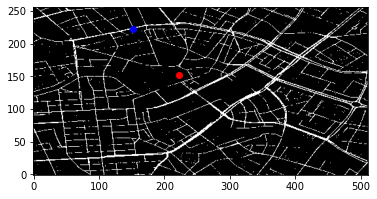

In [28]:
plt.imshow(navigable_map,origin='lower',cmap='gray', vmin=0, vmax=1)
plt.plot(navigable_point[1],navigable_point[0],'bo')
plt.plot(navigable_point[0],navigable_point[1],'ro')

In [9]:
# test for seeds for reset() and action samples

num_episodes=10
num_steps=10
num_actions = 3
seeds = [123,321]

reset_obs=np.full((2,2,num_episodes,16),0.0)
actions=np.full((2,2,num_episodes,num_steps,3),0.0)

for i in range(len(seeds)):
    env_config["seed"]=seeds[i]
    for j in range(2):
        env = gym.make("navsim-v0", env_config=env_config) 
        for e in range(num_episodes):
            reset_obs[i,j,e,:] = env.reset()[-1]
            for s in range(num_steps):
                #for k in range(0,num_actions)
                actions[i,j,e,s,:]=env.action_space.sample()
        env.close()
        del env
#    print(reset_obs)
#    print(actions)
#TODO: add the compare logic

[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5005 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0
[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5005 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0
[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5005 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0
[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5005 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0


In [10]:
# test for fast_forward

num_episodes=20
env_config["seed"]=794

reset_obs=np.full((2,num_episodes,16),0.0)
env_config["debug"]=True


# no fast_forward 10
env_config["start_from_episode"]=1
env_config["log_folder"]="./env_log_1"
env = gym.make("navsim-v0", env_config=env_config) 
for e in range(num_episodes):
    reset_obs[0,e,:] = env.reset()[-1]
env.close()
del env

# no fast forward 5
env_config["start_from_episode"]=1
env_config["log_folder"]="./env_log_2"
env = gym.make("navsim-v0", env_config=env_config) 
for e in range(10):
    reset_obs[1,e,:] = env.reset()[-1]
env.close()
del env
# fast forward 5
env_config["start_from_episode"]=11
env_config["log_folder"]="./env_log_3"

env = gym.make("navsim-v0", env_config=env_config) 
for e in range(10,num_episodes):
    reset_obs[1,e,:] = env.reset()[-1]
env.close()
del env



#    print(reset_obs)
#    print(actions)
#TODO: add the compare logic

[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5005 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0
[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5005 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0
[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5005 to start from episode 11
[INFO] Connected new brain: VectorNavigator?team=0


In [11]:
print(reset_obs[0]-reset_obs[1])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.